In [33]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "Data/mouse_drug_data.csv"
clinical_trial_data_to_load = "Data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv("Data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("Data/clinicaltrial_data.csv")

# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_data, mouse_data, how='outer', on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [34]:
combined_data.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


## Tumor Response to Treatment

In [35]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combined_data_mean = combined_data.groupby(["Drug","Timepoint"]).mean()
combined_data_mean.reset_index(level = None, inplace = True)

# Convert to DataFrame
tumor_mean_df = pd.DataFrame(combined_data_mean)

# Preview DataFrame
tumor_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [36]:
#Below was provided

In [37]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
combined_data_sem = combined_data.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
tumor_vol_sem_df = pd.DataFrame(combined_data_sem)
# Preview DataFrame
tumor_vol_sem_df.head()


Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731

In [38]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table = tumor_mean_df.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
pivot_table.reset_index(level = None, inplace = True)

# Preview that Reformatting worked
pivot_table.head()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [39]:
#below was provided

In [40]:
# 4 specific drugs picked. Corresponding chart
table_picked_drugs = pivot_table[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
table_picked_drugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417


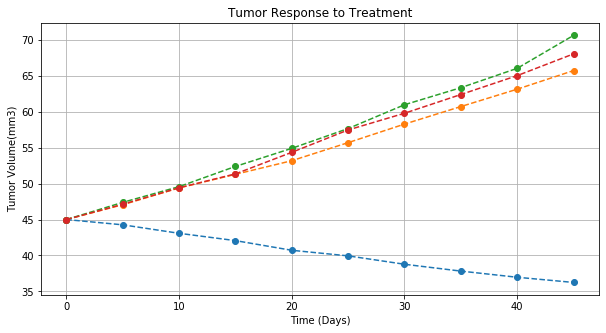

In [41]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10, 5))

# Save the Figure
plt.errorbar(x=table_picked_drugs['Timepoint'],y=table_picked_drugs['Capomulin'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=table_picked_drugs['Timepoint'],y=table_picked_drugs['Infubinol'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=table_picked_drugs['Timepoint'],y=table_picked_drugs['Ketapril'], yerr=None, linestyle="--",fmt='o')
plt.errorbar(x=table_picked_drugs['Timepoint'],y=table_picked_drugs['Placebo'], yerr=None, linestyle="--", fmt='o')
 
plt.ylabel('Tumor Volume(mm3)')
plt.xlabel('Time (Days)')
plt.title('Tumor Response to Treatment')
plt.grid()

# Show the Figure
plt.show()


In [42]:
#HAVE TO PUT IN LEGEND HERE

## Metastatic Response to Treatment

In [43]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combined_data_met= combined_data.groupby(["Drug","Timepoint"]).mean()


# Convert to DataFrame
met_mean_df = pd.DataFrame(combined_data_met["Metastatic Sites"])


# Preview DataFrame
met_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [44]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
combined_data_met_sem = combined_data.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
met_sem_df = pd.DataFrame(combined_data_sem)

# Preview DataFrame
met_sem_df.head()

Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731

In [45]:
# Minor Data Munging to Re-Format the Data Frames
met_mean_df.reset_index(level = None, inplace = True)
met_mean_df2 = pd.DataFrame(combined_data_mean)

pivot_table_met = met_mean_df2.pivot(index ="Timepoint", columns = 'Drug', values = "Metastatic Sites")
pivot_table_met.reset_index(level = None, inplace = True)

# Preview that Reformatting worked
pivot_table_met.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [46]:
met_table_picked_drugs = pivot_table_met[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
met_table_picked_drugs .head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316


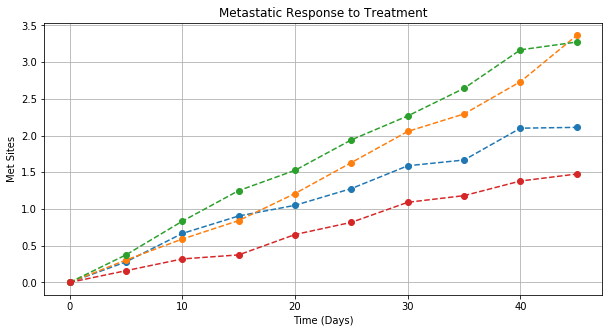

In [47]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10, 5))

plt.ylabel("Met Sites")
plt.xlabel('Time (Days)')
plt.title('Metastatic Response to Treatment')
plt.grid()

plt.errorbar(x=met_table_picked_drugs['Timepoint'],y=met_table_picked_drugs['Infubinol'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=met_table_picked_drugs['Timepoint'],y=met_table_picked_drugs['Ketapril'], yerr=None, linestyle="--",fmt='o')
plt.errorbar(x=met_table_picked_drugs['Timepoint'],y=met_table_picked_drugs['Placebo'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=met_table_picked_drugs['Timepoint'],y=met_table_picked_drugs['Capomulin'], yerr=None, linestyle="--", fmt='o')


      

# Save the Figure
plt.savefig("../MetSiteResponse.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [48]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combined_data.groupby(["Drug","Timepoint"]).count()


# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count["Mouse ID"])
mice_count_df.reset_index(inplace=True)

# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [49]:
# Minor Data Munging to Re-Format the Data Frames
trial_pivot = mice_count_df.pivot(index ="Timepoint", columns = 'Drug', values = "Mouse ID")
trial_pivot.reset_index(level = None, inplace = True)


# Preview the Data Frame
trial_pivot.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


In [53]:
#survival rate calculations (?)
survival_drugs_df = trial_pivot.astype(float)
survival_drugs_df["Capomulin_percent"]=survival_drugs_df["Capomulin"]/survival_drugs_df["Capomulin"].iloc[0] * 100
survival_drugs_df["Infubinol_percent"]=survival_drugs_df["Infubinol"]/survival_drugs_df["Infubinol"].iloc[0] * 100
survival_drugs_df["Ketapril_percent"]=survival_drugs_df["Ketapril"]/survival_drugs_df["Ketapril"].iloc[0] * 100
survival_drugs_df["Placebo_percent"]=survival_drugs_df["Placebo"]/survival_drugs_df["Placebo"].iloc[0] * 100
survival_drugs_df

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol,Capomulin_percent,Infubinol_percent,Ketapril_percent,Placebo_percent
0,0.0,25.0,25.0,25.0,25.0,25.0,25.0,26.0,25.0,26.0,25.0,100.0,100.0,100.0,100.0
1,5.0,25.0,21.0,25.0,23.0,23.0,24.0,25.0,25.0,25.0,24.0,100.0,100.0,92.0,96.0
2,10.0,25.0,20.0,21.0,22.0,21.0,24.0,23.0,24.0,23.0,22.0,100.0,84.0,88.0,96.0
3,15.0,24.0,19.0,21.0,19.0,21.0,20.0,17.0,24.0,23.0,21.0,96.0,84.0,76.0,80.0
4,20.0,23.0,18.0,20.0,19.0,20.0,19.0,17.0,23.0,21.0,17.0,92.0,80.0,76.0,76.0
5,25.0,22.0,18.0,18.0,19.0,18.0,17.0,14.0,23.0,19.0,16.0,88.0,72.0,76.0,68.0
6,30.0,22.0,16.0,17.0,18.0,15.0,15.0,13.0,23.0,18.0,15.0,88.0,68.0,72.0,60.0
7,35.0,22.0,14.0,12.0,17.0,15.0,14.0,10.0,21.0,16.0,14.0,88.0,48.0,68.0,56.0
8,40.0,21.0,14.0,10.0,15.0,15.0,12.0,9.0,20.0,12.0,14.0,84.0,40.0,60.0,48.0
9,45.0,21.0,13.0,9.0,11.0,13.0,11.0,7.0,20.0,11.0,14.0,84.0,36.0,44.0,44.0


No handles with labels found to put in legend.


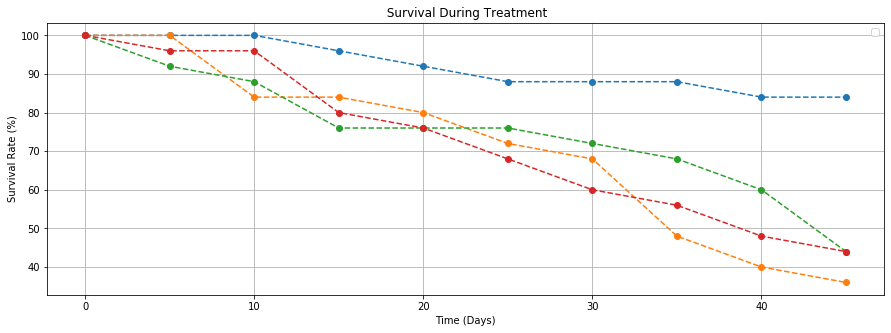

<Figure size 432x288 with 0 Axes>

In [54]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (15, 5))

plt.errorbar(x=survival_drugs_df ['Timepoint'],y=survival_drugs_df['Capomulin_percent'], linestyle="--", fmt='o')
plt.errorbar(x=survival_drugs_df['Timepoint'],y=survival_drugs_df['Infubinol_percent'], linestyle="--", fmt='o')
plt.errorbar(x=survival_drugs_df['Timepoint'],y=survival_drugs_df['Ketapril_percent'], linestyle="--",fmt='o')
plt.errorbar(x=survival_drugs_df['Timepoint'],y=survival_drugs_df['Placebo_percent'], linestyle="--", fmt='o')

plt.ylabel("Survival Rate (%)")
plt.xlabel('Time (Days)')
plt.title(' Survival During Treatment')
plt.grid()
plt.legend()       
plt.show()

# Save the Figure

plt.savefig("../SurvivalData.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [63]:
# Calculate the percent changes for each drug
Capomulin_percent=(trial_pivot["Capomulin"].iloc[9]-trial_pivot["Capomulin"].iloc[0])/trial_pivot["Capomulin"].iloc[0]*100
Infubinol_percent=(trial_pivot["Infubinol"].iloc[9]-trial_pivot["Infubinol"].iloc[0])/trial_pivot["Infubinol"].iloc[0]*100
Ketapril_percent=(trial_pivot["Ketapril"].iloc[9]-trial_pivot["Ketapril"].iloc[0])/trial_pivot["Ketapril"].iloc[0]*100
Placebo_percent=(trial_pivot["Placebo"].iloc[9]-trial_pivot["Placebo"].iloc[0])/trial_pivot["Placebo"].iloc[0]*100

# Display the data to confirm
Capomulin_percent
Infubinol_percent
Ketapril_percent
Placebo_percent



-56.00000000000001

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)